In [14]:
# https://medium.com/@AnasBrital98/introduction-to-support-vector-machine-2a2091401858

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter
from sklearn.metrics import accuracy_score
np.random.seed(42)


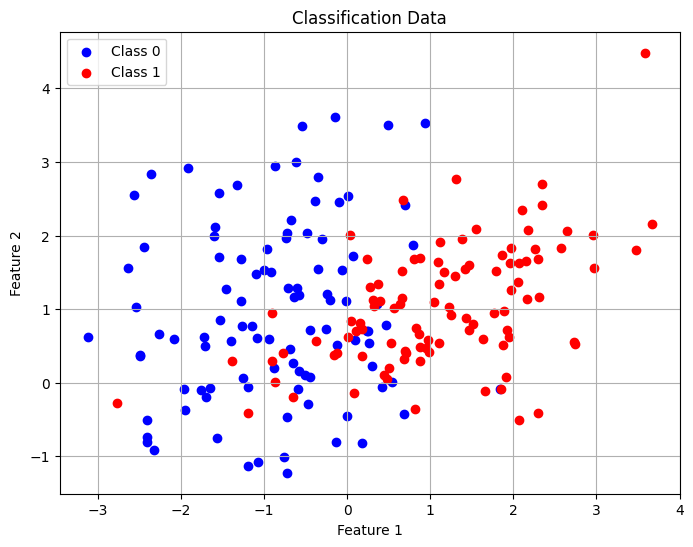

In [103]:
num_samples = 200
num_features = 2

type = "regression"
type = "classification"

if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X, y = gen.get_data(type=type)

plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)

In [74]:
# TODO: apply kernels
# TODO: multi-class??  https://www.baeldung.com/cs/svm-multiclass-classification


In [104]:
## Binary classification with out kernels, classes are -1 to 1 when training
num_samples, num_features = X.shape

w = np.zeros(num_features)
b = 0

y_ = np.where(y==0 , -1 , 1)

learning_rate = 0.01
lambda_parameter  = 0.01
max_iter = 1000

for _ in range(max_iter):
    for idx, xi in enumerate(X):
        yi =  y_[idx] 
        condition = yi * (np.dot(xi, w) - b) >= 1
        if condition :
            dw = 2 * lambda_parameter * w
            db = 0
        else :
            dw = 2 * lambda_parameter * w - np.dot(xi , yi)
            db = yi
        w -= learning_rate * dw
        b -= learning_rate * db
        

predictions = np.sign(np.dot(X , w) - b)

accuracy_score(y_, predictions)


0.84

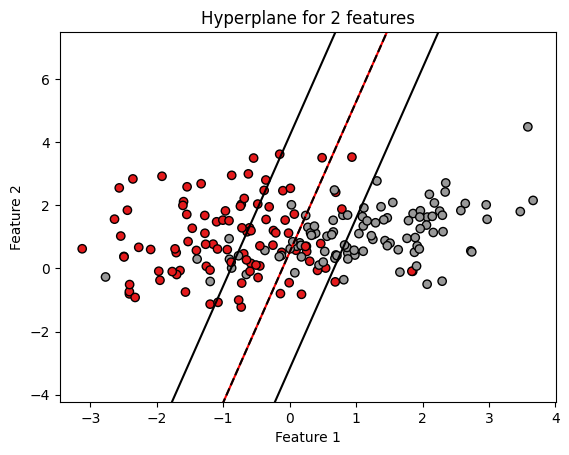

In [105]:
fig , ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

x0_min = np.amin(X[:,0])
x0_max = np.amax(X[:,0])

x1_x_for_separator = (-w[0] * x0_min + b + 0 ) / w[1]
x1_y_for_separator = (-w[0] * x0_max + b + 0 ) / w[1]

x1_x_for_class1 = (-w[0] * x0_min + b -1 ) / w[1]
x1_y_for_class1 = (-w[0] * x0_max + b -1 ) / w[1]

x1_x_for_class2 = (-w[0] * x0_min + b + 1 ) / w[1]
x1_y_for_class2 = (-w[0] * x0_max + b + 1 ) / w[1]

ax.plot([x0_min , x0_max] , [x1_x_for_separator , x1_y_for_separator] , "red")
ax.plot([x0_min , x0_max] , [x1_x_for_class1 , x1_y_for_class1] , "black")
ax.plot([x0_min , x0_max] , [x1_x_for_class2 , x1_y_for_class2] , "black")

hyperplane_slope = -w[0] / w[1]
hyperplane_intercept = b / w[1]
x_values = np.linspace(x0_min, x0_max, 10)
y_values = hyperplane_slope * x_values + hyperplane_intercept 
plt.plot(x_values, y_values, color='k', linestyle='--')

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane for 2 features')
plt.show()


In [127]:
def linear_kernel(X1,X2):
    return X1.T @ X2
    
def polynomial_kernel(X1, X2, d = 2):
    return (1+X1.T @ X2)**d


def similarity(x,l, sigma = 0.3):
        return np.exp(-sum((x-l)**2)/(2*sigma**2))

def gaussian_kernel(x1,x2):
    m=x2.shape[0]
    n=x1.shape[0]
    op=[[similarity(x1[x_index],x2[l_index]) for l_index in range(m)] for x_index in range(n)]
    return np.array(op)
    
gaussian_kernel(X,X).shape

(200, 200)

In [107]:
X0 = X[:,0]
X1 = X[:,1]
X0 = np.expand_dims(X0, axis=1)
X1 = np.expand_dims(X1, axis=1)
X0 = X[:,0]
X1 = X[:,1]

print(X0.shape,X1.shape)
square_matrix = X0.T @ X1


(200,) (200,)


In [118]:
# kernels

num_samples, num_features = X.shape

kernel = "poly"

if kernel == "poly":
    phi = polynomial_kernel(np.expand_dims(X[:,0], axis=1),np.expand_dims(X[:,1], axis=1))
    phi = polynomial_kernel(X[:,0],X[:,1], d = 1)
    print(phi)

if kernel == "gaussian":
    X=self.gaussian_kernel(X,X)
    num_samples, num_features = X.shape

num_samples, num_features = X.shape
    
w = np.zeros(num_features)
b = 0

    
y_ = np.where(y==0 , -1 , 1)

learning_rate = 0.01
lambda_parameter  = 0.01
max_iter = 1000

for _ in range(max_iter):
    for idx, xi in enumerate(X):
        yi =  y_[idx] 
        condition = yi * (np.dot(xi, w) - b) >= 1
        
        if condition :
            dw = 2 * lambda_parameter * w
            db = 0
        else :
            dw = 2 * lambda_parameter * w - np.dot(xi , yi)
            db = yi
        w -= learning_rate * dw
        b -= learning_rate * db
        

predictions = np.sign(np.dot(X , w) - b)

accuracy_score(y_, predictions)


95.46480639754321


0.84